# Directed Acyclic Graph (DAG)의 개념과 활용

## DAG의 기본 개념

- 단방향성: DAG(방향성 비순환 그래프)는 인과 관계가 한 방향으로만 흐르며, 순환(cycle)이 없는 구조를 가진다. 이는 시간이 앞으로만 진행된다는 전제를 의미한다.
    - 역인과(reverse causality): DAG에서 표현하려면 동일한 노드의 시간 차원을 추가해야 한다.
    - 동시성(simultaneity): 예를 들어, 공급과 수요처럼 동시에 발생하는 관계는 DAG로 표현하기 어렵다(Heckman and Pinto, 2015). 이러한 경우 다른 접근법이 필요하다.

## 인과 관계와 반사실적(counterfactuals)
- 인과 효과는 실제로 관찰된 세계(어떤 개입이 특정 값을 가졌을 때의 결과)와 그렇지 않은 세계(반사실적 상황) 간의 비교를 통해 정의된다.
- DAG는 인과 효과의 사슬(causal chain)을 그래픽으로 표현하며, 이는 아래 요소로 구성된다:
    - 노드(Node): 랜덤 변수.
    - 화살표(Arrow): 변수 간 인과 관계를 나타내며, 화살표의 방향은 인과 효과의 방향을 의미.

## 인과 효과의 두 가지 유형

1. 직접 효과 (Direct Effect):
   
- A → B: A가 직접적으로 B에 영향을 미치는 관계.
  
2. 간접 효과 (Indirect Effect):
   
- A → C → B: A가 C를 매개로 B에 영향을 미치는 경우.
- 질문의 맥락에 따라 매개 변수(C)가 중요할 수도 있고 아닐 수도 있다.

## DAG의 특징
- **인과 경로**(causal pathway)를 명시적으로 나타냄.

- 인과 경로의 부재도 명시적으로 드러냄(화살표가 없는 경우).
    - 화살표의 부재는 해당 데이터에 인과 관계가 없다는 강한 신념을 반영.

- 완전한 DAG는:
    - 그래프에 포함된 모든 변수 간의 직접적인 인과 효과를 포함.
    - 모든 변수 쌍의 공통 원인을 포함.

## DAG의 활용 이유
- 사전 지식의 중요성: DAG는 인과 효과 식별에서 사전 지식의 핵심적인 역할을 이해하는 데 도움을 준다.
- 연구 설계와 추정치의 시각적 소통:
    - 그림은 텍스트보다 직관적이며 특히 도구 변수(instrumental variables) 같은 개념에 유용하다.
- 연구 설계 개선:
    - 백도어 기준(backdoor criterion) 및 콜라이더 편향(collider bias) 같은 개념을 통해 개입의 인과 효과를 식별할 수 있는 신뢰할 만한 연구 설계를 개발.
- 학파 간 다리 역할:
    - 구조적 접근법(structural approach)과 축약형 접근법(reduced-form approach) 간의 연결 고리를 제공.
- 가정의 중요성 강조:
    - 모든 인과 효과 식별에는 가정이 필요하며, 이는 경제학자들이 오래전부터 주장해 온 핵심 사항이다(Wolpin, 2013).

# A simple DAG

<img src='img/ci_02_1.png' width=300>

이 DAG에는 세 가지 랜덤 변수 $X,D,Y$가 있다.

- **직접 경로**: $D \rightarrow Y$는 인과 효과를 나타내는 경로다. 이는 $D$가 $Y$에 직접적으로 영향을 미친다는 것을 뜻한다.

- **백도어 경로**(Backdoor Path): $D ← X → Y$는 $D$와 $Y$ 간의 또 다른 경로다. 그러나 이 경로는 인과적이지 않다. 이는 $X$라는 변수의 변동이 $D$와 $Y$ 간의 **가짜 상관관계**(**spurious correlation**)를 만들어내는 과정이다.


백도어 경로(backdoor path) 개념은 DAG에서 배우는 가장 중요한 요소 중 하나이다.
- 이는 **누락 변수 편향**(**omitted variable bias**)의 개념과 유사하다.
- $X$는 혼란 변수(confounder)로서 $D$와 $Y$를 동시에 결정하므로, $D$의 $Y$에 대한 효과를 직접적으로 비교할 때 이를 왜곡(confound)한다.

예를 들어:
- 경우 1: $D$가 다른 값을 가질 때, 이는 $D$가 $Y$를 유발하여 $Y$가 변한다.
- 경우 2: $D$와 $Y$가 모두 변하는 이유는 $X$ 때문이다. 이 경우, $D$와 $Y$ 간의 상관관계 중 일부는 가짜다.

<img src='img/ci_02_2.png' width=300>

이번에는 관측되지 않는 혼란 변수 $U$가 존재한다. 관측되지 않은 변수의 경우, 관련된 화살표는 **점선**(dashed line)으로 나타낸다.

$U$는 백도어 경로를 따라 있는 **비충돌자**(noncollider)다. 그러나 $U$는 관측되지 않으므로 데이터 세트에 포함되지 않는다. 이로 인해 백도어 경로가 열려(backdoor pathway is *open*) 있으며, $D$와 $Y$ 간의 상관관계에 편향을 초래한다.

# 충돌자(Colliding)

<img src='img/ci_02_3.png' width=300>

이 DAG에서 $D$에서 $Y$로 가는 두 가지 경로가 있다:
1. 직접 경로: $D→Y$. 이는 인과적 경로(causal path)이다.
2. 백도어 경로: $D→X←Y$

여기서 백도어 경로의 중요한 차이점은 $X$가 **콜라이더**(collidor)라는 점이다.

- $X$는 $D$와 $Y$로부터 화살표를 받는 변수다.
- 경로상에서 두 변수가 제3의 변수에 영향을 미칠 때, 이를 콜라이더라고 한다.

콜라이더의 특징:

- 콜라이더가 백도어 경로에 등장하면, 백도어 경로는 콜라이더의 존재로 인해 닫히게(closed) 된다.
- 즉, 별다른 조치를 취하지 않아도, 콜라이더는 자동으로 특정 백도어 경로를 차단한다.

## Backdoor criterion

**백도어 경로**(**open backdoor path**)는 인과 추론에서 중요한 문제로, 관심 있는 인과 변수와 결과 변수 사이에 체계적이면서도 비인과적인 상관관계를 만들어낸다.

- 문제점: 회귀 분석의 관점에서, 열린 백도어 경로는 누락 변수 편향(omitted variable bias을 초래한다. 이는 분석의 방향을 왜곡하거나 부호를 완전히 반전시킬 정도로 심각한 영향을 줄 수 있다.
- 목표: 열린 백도어 경로를 닫아(closing the backdoor path) D가 Y에 미치는 인과적 효과(causal effect)를 분리하는 것이다.

백도어 경로를 닫는 두 가지 방법:
- 혼란 변수(confounder)를 조건화(conditioning)하기:
    - 혼란 변수를 통제하는 방법으로, 회귀 분석, 매칭(matching), 하위분류(subclassification) 등을 통해 변수를 고정시키는 것이다.
    - 이는 회귀 분석에서 변수에 대해 "통제(controlling)"하는 것과 동일하다.
- 콜라이더(colliders) 활용:
    - 백도어 경로에 콜라이더가 존재하면, 백도어 경로는 자동으로 닫힌다.
    - 그러나 콜라이더를 조건화하면 백도어 경로가 다시 열리므로, 콜라이더를 무시하는 것이 더 적합할 수 있다.

백도어 기준(Backdoor Criterion):
- 백도어 경로가 모두 닫히면, 해당 연구 설계는 **백도어 기준**을 만족(satisfy the **backdoor criterion**)한다고 본다.
- 백도어 기준을 만족하면 D가 Y에 미치는 인과적 효과를 고립시킬 수 있다.
- 변수 집합 X가 DAG에서 백도어 기준을 충족하려면, X가 D→Y 경로에서 모든 혼란 변수 경로를 차단해야 한다.

<img src='img/ci_02_4.png' width=350>

위 DAG에서 $D$는 처리 변수(예: 대학 교육), $Y$는 결과 변수(예: 소득), $PE$는 부모의 교육 수준, $I$는 가족 소득, $B$는 유전, 가족 환경, 정신적 능력과 같은 관측되지 않은 배경 요인을 나타낸다.

백도어 기준(backdoor criterion)을 충족하기 위해 최소한으로 필요한 조건화는  $I$를 통제하는 것이다.
- $I$는 모든 백도어 경로에서 **비충돌자**(noncollider)로 나타나므로, 이를 조건화하면 경로가 닫히게 된다.
- 가장 간단한 접근법은 아래 회귀식을 사용하는 것이다.
$$Y_i = \alpha + \sigma D_i + \beta I_i + \epsilon_i$$

$I$를 조건화함으로써 추정된 $\sigma$는 인과적 해석(causal interpretation)을 가질 수 있다.

하지만 연구자는 이 DAG에 대해 의문을 가질 수 있다. 예를 들어, 경제 이론이나 기존 문헌을 검토하면서, B와 Y 간의 관계가 실제로 없다는 점에 대해 회의적일 수 있다.

- 이러한 의심은 B에서 Y로 이어지는 직접 경로가 있어야 한다는 믿음으로 이어질 수 있다.
- 이는 B와 Y 간의 관계가 D나 PE를 통해서만 매개되지 않을 수 있다는 가능성을 제기한다.

콜라이더에 조건화했는지(데이터 세트에는 "콜라이더"나 "혼란 변수(confounder)"라는 표시는 없다) 확인하려면 DAG와 모델이 필요하며, 이는 변수의 데이터 생성 과정을 이해하고 논리와 이론을 통해 경로를 배제하는 작업을 요구한다. 모든 실증 연구는 이론에 기반해야 하며, 가정 없이는 처리 효과를 식별할 수 없다.

## 콜라이더 편향

In [12]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
from stargazer.stargazer import Stargazer

# read data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file): 
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)



tb = pd.DataFrame({
    'female': np.random.binomial(1, .5, size=10000),
    'ability': np.random.normal(size=10000)})
tb['discrimination'] = tb.female.copy()
tb['occupation'] = 1 + 2*tb['ability'] + 0*tb['female'] - 2*tb['discrimination'] + np.random.normal(size=10000)
tb['wage'] = 1 - 1*tb['discrimination'] + 1*tb['occupation'] + 2*tb['ability'] + np.random.normal(size=10000) 



lm_1 = sm.OLS.from_formula('wage ~ female', data=tb).fit()
lm_2 = sm.OLS.from_formula('wage ~ female + occupation', data=tb).fit()
lm_3 = sm.OLS.from_formula('wage ~ female + occupation + ability', data=tb).fit()


st = Stargazer((lm_1,lm_2,lm_3))
st.custom_columns(["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1])
st

In [14]:
start_is_born = pd.DataFrame({
    'beauty': np.random.normal(size=2500),
    'talent': np.random.normal(size=2500)})
    
start_is_born['score'] = start_is_born['beauty'] + start_is_born['talent']
start_is_born['c85'] = np.percentile(start_is_born['score'], q=85)
start_is_born['star'] = 0
start_is_born.loc[start_is_born['score']>start_is_born['c85'], 'star'] = 1
start_is_born.head()


lm = sm.OLS.from_formula('beauty ~ talent', data=start_is_born).fit()

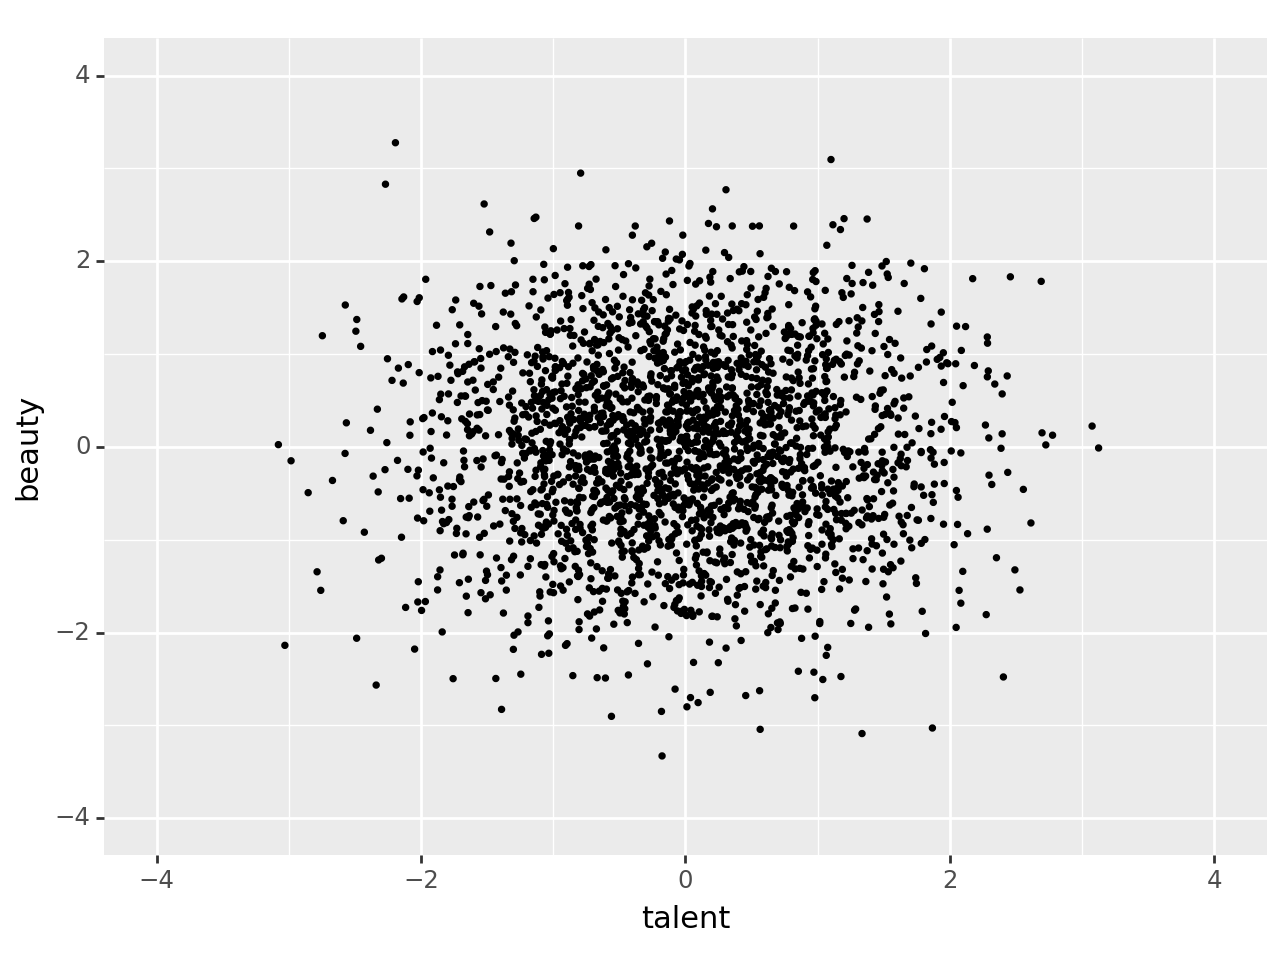

<Figure Size: (640 x 480)>

In [15]:
p.ggplot(start_is_born, p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)

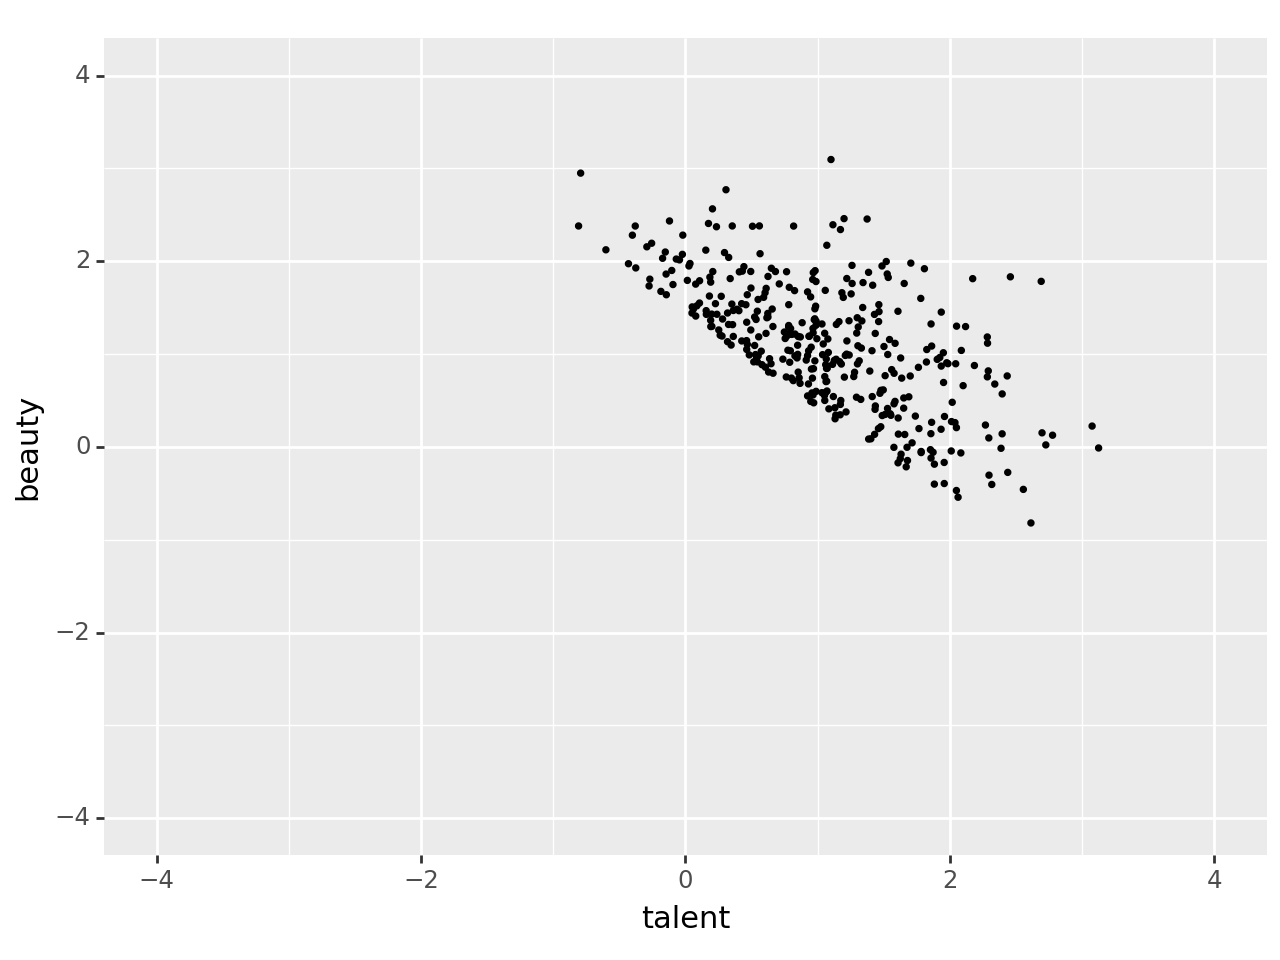

<Figure Size: (640 x 480)>

In [16]:
p.ggplot(start_is_born[start_is_born.star==1], p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)

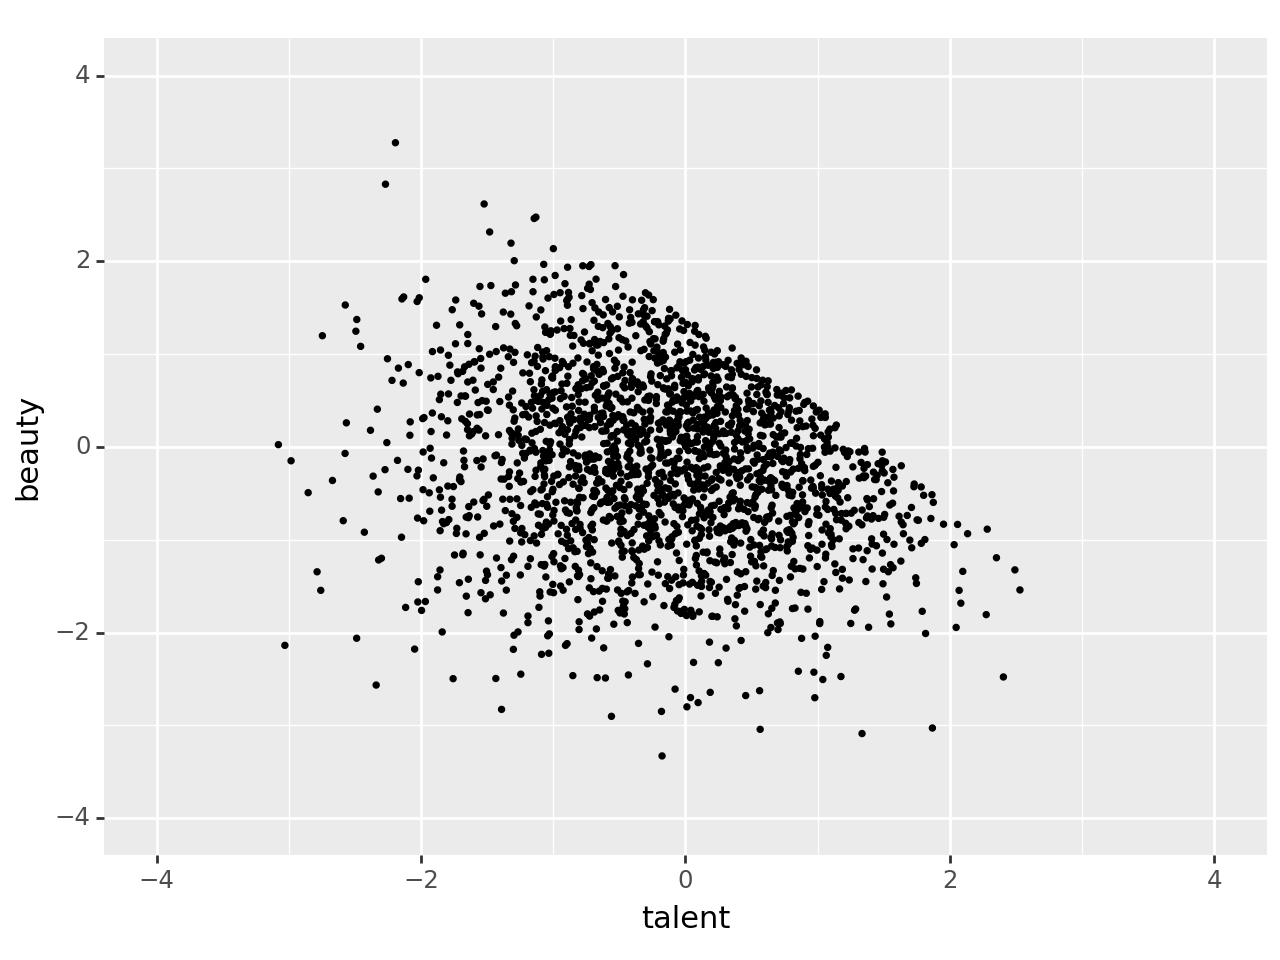

<Figure Size: (640 x 480)>

In [17]:
p.ggplot(start_is_born[start_is_born.star==0], p.aes(x='talent', y='beauty')) +    p.geom_point(size = 0.5) +    p.xlim(-4, 4) +    p.ylim(-4, 4)